## Reference: https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
# Import train and test split
from sklearn.model_selection import train_test_split

# Improt preprocessing module
from sklearn import preprocessing

# Import Random Forest
from sklearn.ensemble import RandomForestRegressor

# Import cross-validation tools
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Import metrics for model performance
from sklearn.metrics import mean_squared_error, r2_score

# Import module for storing arrays
import joblib

from sklearn.neighbors import KNeighborsClassifier

***

## Step 3: Load Dataset from file in Repository

<br>

In [131]:
data_1 = pd.read_csv('titanic.csv')

In [132]:
print(data_1.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [28]:
print(data_1.shape)

(887, 8)


In [29]:
data_1

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


***

### Remove Semicolons from the data

<br>

In [30]:
data_2 = data_1

#print(data_2.head)

***

### Check out the shape and summary statistics of the data

<br>

In [31]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
print(data_2.shape)

(1599, 12)


***

## Create groups of 'quantity' values as either 'bad' or good'

In [5]:
pd.set_option('display.max_rows', 1000)

## Import Dataset

In [133]:
data_2 = pd.read_csv('Diet.csv')


In [134]:
data_2

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
7,6,0,50,201,66,1,64.0
8,7,0,37,174,67,1,65.0
9,8,0,28,176,69,1,60.5


## Create 'WeightLost' Column

In [135]:
weightLost_df['weightLost'] = data_2['pre.weight'] - data_2['weight6weeks']

In [136]:
result = pd.concat([data_2, weightLost_df], axis=1, join="inner")

In [137]:
data_2 = result.rename(columns={0: 'weightLost'})  # new method

In [138]:
#Run once:
#data_2['Diet'] = data_2['Diet'] - 1

In [139]:
data_2

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightLost
0,25,NaN,41,171,60,2,60.0,0
1,26,NaN,32,174,103,2,103.0,0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6
4,3,0,55,170,64,1,63.3,0.7
5,4,0,33,171,64,1,61.1,2.9
6,5,0,50,170,65,1,62.2,2.8
7,6,0,50,201,66,1,64.0,2
8,7,0,37,174,67,1,65.0,2
9,8,0,28,176,69,1,60.5,8.5


## Assumption 1: Dependent Variable

### Dependent: Weightost

In [140]:
weightLost = data_2['weightLost']

## Assumption 2: Independent Variable

### 1: Diet

In [141]:
Diet = data_2['Diet']

### 2: gender

In [142]:
gender = data_2['gender']

## Assumption 4: Outliers

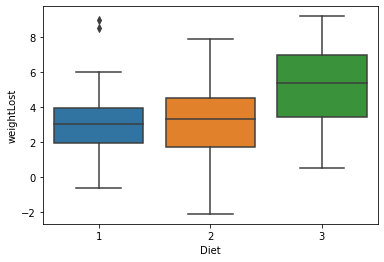

In [143]:
sns.boxplot(x=Diet, y=weightLost)

In [144]:
weightLost.describe()

count     78.0
unique    54.0
top        2.0
freq       4.0
Name: weightLost, dtype: float64

## Assumption 5: Normality

In [157]:
from seaborn import displot

ImportError: cannot import name 'displot' from 'seaborn' (c:\users\hp\anaconda3\lib\site-packages\seaborn\__init__.py)

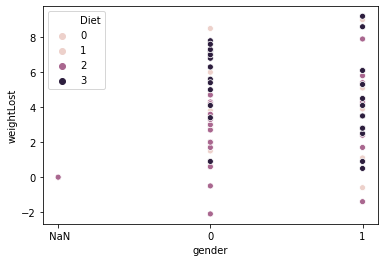

In [146]:
sns.scatterplot(data_2['gender'], weightLost, hue=data_2['Diet'])